# COMP0005 - GROUP COURSEWORK 2023-24

# Gesture Recognition via Convex Hull


In [1]:
# helper functions

import math


def orientation(p, q, r):
    val = (q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1])
    if val < 0:
        return -1  # right turn
    elif val > 0:
        return 1  # left turn
    else:
        return 0  # collinear


def distance(p, q):
    return (p[0] - q[0])**2 + (p[1] - q[1])**2

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.


In [2]:
def jarvismarch(inputSet):
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
        '''
    #invalid convex hull
    if len(inputSet) < 3:
        return inputSet
    #find the leftmost point
    on_Convexhull = min(inputSet)
    outputSet = []
    while True:
        #add the leftmost point to the output set
        outputSet.append(on_Convexhull)
        #find the next point
        next_point = inputSet[0]
        for point in inputSet:
            o = orientation(on_Convexhull, next_point, point)
            #if the point is on the convex hull or the next point is the first point or the distance between the point and the next point is greater than the distance between the point and the on_Convexhull
            if next_point == on_Convexhull or o == 1 or (o == 0 and distance(on_Convexhull, point) > distance(on_Convexhull, next_point)):
                next_point = point
        on_Convexhull = next_point
        if on_Convexhull == outputSet[0]:
            break
    return outputSet

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).


In [3]:
#finds the relative polar angle of p2 from p1
def relative_polar_angle(p1, p2):
    v = (p2[0]-p1[0], p2[1]-p1[1])
    size_v = (v[0] ** 2 + v[1] ** 2)**(0.5)
    cos_polar_angle = v[0]/size_v
    relative_angle = cos_polar_angle*(-1)
    return (relative_angle)


def graham_orientation(p1, p2, p3):
    val = (p3[0]-p2[0])*(p2[1]-p1[1]) - (p2[0]-p1[0])*(p3[1]-p2[1])
    if val < 0:
        return -1  # right turn
    elif val > 0:
        return 1  # left turn
    else:
        return 0  # collinear


def merge_sort(array, key):
    if len(array) <= 1:
        return array

    mid = len(array) // 2
    left_half = merge_sort(array[:mid], key)
    right_half = merge_sort(array[mid:], key)

    return merge(left_half, right_half, key)


def merge(left, right, key):
    merged = []
    left_index = 0
    right_index = 0

    while left_index < len(left) and right_index < len(right):
        if key(left[left_index]) < key(right[right_index]):
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1

    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1

    return merged


def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points

    '''
    outputSet = []
    top = 0
    original_dict = {}
    points_dict = {}

    if len(inputSet) < 3:
        return inputSet

    # find point with smallest y coordinate in list
    min_index = 0
    for i in range(len(inputSet)):
        if inputSet[i][1] < inputSet[min_index][1]:
            min_index = i
        elif inputSet[i][1] == inputSet[min_index][1]:
            if inputSet[i][0] < inputSet[min_index][0]:
                min_index = i

    # add po to convex hull stack
    p0 = inputSet[min_index]
    outputSet.append(p0)

    # make a dictionary with polar angle for each point
    for i in range(len(inputSet)):
        if inputSet[i] != p0:
            original_dict[inputSet[i]] = relative_polar_angle(p0, inputSet[i])

    # remove duplicate polar angle points by distance
    for a_key, a_value in original_dict.items():
        if a_value in points_dict:
            coords = next(
                (key for key, value in original_dict.items() if value == a_value), None)
            if coords is not None and distance(a_key, p0) > distance(coords, p0):
                del points_dict[coords]
                points_dict[a_key] = a_value
        else:
            points_dict[a_key] = a_value

    # make a sorted list of points by polar angle from p0s
    sorted_points = merge_sort(
        list(points_dict.keys()), lambda k: points_dict[k])

    num_points = len(sorted_points)

    if num_points < 3:
        return inputSet

    # push p1,p2 onto convex hull stack
    outputSet.append(sorted_points[0])
    outputSet.append(sorted_points[1])
    top += 2

    #remove points less convex and the most convex point
    for i in range(2, num_points):
        while (top >= 1) and (graham_orientation(outputSet[top-1], outputSet[top], sorted_points[i]) != -1):
            outputSet.pop()
            top -= 1
        outputSet.append(sorted_points[i])
        top += 1

    return outputSet

Use the cell below for all python code needed to realise the **Chan's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).


In [4]:
def partition_points(inputSet, m):
    return ([inputSet[i:i + m] for i in range(0, len(inputSet), m)]) #partition points each with size at most m

#find the right tangent of a point to a hull
def right_tangent(hull, p):
    left, right = 0, len(hull)

    # initial orientation
    left_prev = orientation(p, hull[0], hull[-1])
    left_next = orientation(p, hull[0], hull[(left + 1) % right])

    while left < right:
        mid = (left + right) // 2

        mid_prev = orientation(p, hull[mid], hull[(mid - 1) % len(hull)])
        mid_next = orientation(p, hull[mid], hull[(mid + 1) % len(hull)])
        mid_side = orientation(p, hull[left], hull[mid])

        if mid_prev != -1 and mid_next != -1:
            return mid
        elif (mid_side == 1 and (left_next == -1 or left_prev == left_next)) or (mid_side == -1 and mid_prev == -1):
            right = mid
        else:
            left = mid + 1
            left_prev = -mid_next
            if left == len(hull):
                return -1
            left_next = orientation(p, hull[left], hull[(left + 1) % len(hull)])
    return left


def find_min_hull_pair(hulls):
    hull, point = 0, 0
    for i in range(len(hulls)):
        j = min(range(len(hulls[i])), key=lambda j: hulls[i][j])
        if hulls[i][j] < hulls[hull][point]:
            hull, point = i, j
    return (hull, point)


def find_next_hull_pair(hulls, pair):
    p = hulls[pair[0]][pair[1]]
    next_pair = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
    for h in (i for i in range(len(hulls)) if i != pair[0]):
        s = right_tangent(hulls[h], p)
        q, r = hulls[next_pair[0]][next_pair[1]], hulls[h][s]
        t = orientation(p, q, r)
        if t == -1 or t == 0 and distance(p, r) > distance(p, q):
            next_pair = (h, s)
    return next_pair


def chan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chan's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points

    '''

    n = len(inputSet)
    t = 3

    while True:
        m = min(2**(2**t), n)

        # partial chan
        groups = partition_points(inputSet, m)
        hulls = [grahamscan(group) for group in groups]
        hull = [find_min_hull_pair(hulls)]
        for _ in range(m):
            p = find_next_hull_pair(hulls, hull[-1])
            if p == hull[0]:
                return [hulls[h][i] for h, i in hull]
            hull.append(p)
        t += 1

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).


In [5]:
import random


class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------

    [to be defined as part of the coursework]

    Methods
    -------

    [to be defined as part of the coursework]

    """

    MIN_POINT = 0
    MAX_POINT = 32767

    def __init__(self):
        pass

    def generate_random_points(self, num_points):
        points = set()
        # ensures no duplicate points
        while len(points) < num_points:
            point = (random.randint(self.MIN_POINT, self.MAX_POINT),
                     random.randint(self.MIN_POINT, self.MAX_POINT))
            points.add(point)
        return list(points)

    def generate_convex_polygon(self, num_points, h=None):
        # uses valtr's algorithm to generate integer points with a given h
        # source: https://stackoverflow.com/questions/6758083/how-to-generate-a-random-convex-polygon

        if not h:
            h = num_points

        xs = [random.randint(0, 32767) for _ in range(h)]
        ys = [random.randint(0, 32767) for _ in range(h)]
        xs = sorted(xs)
        ys = sorted(ys)
        min_x, *xs, max_x = xs
        min_y, *ys, max_y = ys
        vectors_xs = self.to_vectors_coordinates(xs, min_x, max_x)
        vectors_ys = self.to_vectors_coordinates(ys, min_y, max_y)
        random.shuffle(vectors_ys)

        def to_vector_angle(vector):
            x, y = vector
            return math.atan2(y, x)

        vectors = sorted(zip(vectors_xs, vectors_ys),
                         key=to_vector_angle)
        point_x = point_y = 0
        min_polygon_x = min_polygon_y = 0
        points = []
        for vector_x, vector_y in vectors:
            points.append((point_x, point_y))
            point_x += vector_x
            point_y += vector_y
            min_polygon_x = min(min_polygon_x, point_x)
            min_polygon_y = min(min_polygon_y, point_y)
        shift_x, shift_y = min_x - min_polygon_x, min_y - min_polygon_y
        polygon = [(point_x + shift_x, point_y + shift_y)
                   for point_x, point_y in points]
        polygon.extend(self.generate_points_in_polygon(
            polygon, num_points - h))

        return polygon

    def to_vectors_coordinates(self, coordinates, min_coordinate, max_coordinate):
        # helper method for valtr's algorithm
        last_min = last_max = min_coordinate
        result = []
        for coordinate in coordinates:
            if random.getrandbits(1):
                result.append(coordinate - last_min)
                last_min = coordinate
            else:
                result.append(last_max - coordinate)
                last_max = coordinate
        result.extend((max_coordinate - last_min,
                       last_max - max_coordinate))
        return result

    def is_point_in_polygon(self, point, polygon):
        # raycasting method to check if point is in polygon
        x, y = point
        poly_points = [(x, y) for x, y in polygon]
        n = len(poly_points)
        inside = False

        p1x, p1y = poly_points[0]
        for i in range(n + 1):
            p2x, p2y = poly_points[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            x_intersection = (y - p1y) * \
                                (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= x_intersection:
                            inside = not inside
            p1x, p1y = p2x, p2y

        return inside

    def generate_points_in_polygon(self, polygon, n):
        min_x = min(x for x, y in polygon)
        max_x = max(x for x, y in polygon)
        min_y = min(y for x, y in polygon)
        max_y = max(y for x, y in polygon)

        points = []
        while len(points) < n:
            random_point = (random.randint(min_x, max_x),
                            random.randint(min_y, max_y))
            if self.is_point_in_polygon(random_point, polygon):
                points.append(random_point)
        return points

Use the cell below to implement the requested **experimental framework** API.


In [6]:
import timeit
import matplotlib.pyplot as plt


class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------

    [to be defined as part of the coursework]

    Methods
    -------

    [to be defined as part of the coursework]
    """

    n_points = [10, 100, 500, 1000, 5000, 10000] # n values to print times for

    def __init__(self, algorithms):
        self.algorithms = algorithms
        # key is algorithm name, values is a list of tuples (n, average time)
        self.random_results = {}
        self.convex_results = {}
        self.h_results = {}
        self.constant_n = None
        self.values = []
        self.data_generator = TestDataGenerator()

    def measure_time(self, function, points):
        # run algorithm and measure time
        start_time = timeit.default_timer()
        hull = function(points)
        end_time = timeit.default_timer()
        return (end_time - start_time), hull

    def run_experiment(self, repeats, experiment_type):
        if experiment_type == 'random':
            data_generator = self.data_generator.generate_random_points
            results_dict = self.random_results
        elif experiment_type == 'convex':
            data_generator = self.data_generator.generate_convex_polygon
            results_dict = self.convex_results
        elif experiment_type == 'h':
            data_generator = self.data_generator.generate_convex_polygon
            results_dict = self.h_results

        for value in self.values:  # repeated with different values of n/h
            points = []
            point_storage = []
            for i, algorithm in enumerate(self.algorithms):
                times = []
                # repeated with new points and then average time is used
                for repeat in range(repeats):
                    if i == 0:
                        if experiment_type == 'h':
                            points = data_generator(self.constant_n, value)
                        else:
                            points = data_generator(value)
                        point_storage.append(points) # save points from first experiment
                    else:
                        points = point_storage[repeat]
                    time, hull = self.measure_time(algorithm, points)
                    times.append(time)
                average_time = self.calculate_average_time(times)
                if algorithm.__name__ not in results_dict:
                    results_dict[algorithm.__name__] = []
                results_dict[algorithm.__name__].append((value, average_time))
                if value in self.n_points and experiment_type != 'h':
                    print(
                        f'{algorithm.__name__}: n = {value}, average time = {round(average_time, 9)}')  # round to 8dp
        self.plot_results(results_dict, experiment_type)

    def run_random_experiment(self, n_values, repeats=1):
        self.random_results = {}
        self.values = n_values
        self.run_experiment(repeats, 'random')

    def run_convex_experiment(self, n_values, repeats=1):
        self.convex_results = {}
        self.values = n_values
        self.run_experiment(repeats, 'convex')

    def run_h_experiment(self, h_values, n, repeats=1):
        self.h_results = {}
        self.constant_n = n
        self.values = h_values
        self.run_experiment(repeats, 'h')

    def plot_results(self, results_dict, experiment_type):
        # plots algorithms against eachother
        for algorithm, results in results_dict.items():
            x, y = zip(*results)
            plt.plot(x, y, label=algorithm)

        if experiment_type == 'h': # h on x axis
            plt.title(f'independent h with constant n = {self.constant_n}')
            plt.xlabel('h (number of points on convex hull)')
        else: # n on x axis
            plt.xlabel('n (number of points)')
            plt.title(f'{experiment_type} points')

        plt.ylabel('average time (seconds)')
        plt.grid(True)
        plt.legend()
        plt.show()

    def plot_algorithm(self, algorithm_name):
        # plots the random and convex results of a specific algorithm
        all_results = {'random': self.random_results,
                       'convex': self.convex_results}
        for experiment_type, results_dict in all_results.items():
            if algorithm_name in results_dict:
                x, y = zip(*results_dict[algorithm_name])
                plt.plot(x, y, label=experiment_type)
        plt.xlabel('n (number of points)')
        plt.ylabel('average time (seconds)')
        plt.title(f'{algorithm_name}')
        plt.grid(True)
        plt.legend()
        plt.show()

    def calculate_average_time(self, times):
        return sum(times) / len(times) if times else 0

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.


grahamscan: n = 100, average time = 0.00028712
grahamscan: n = 500, average time = 0.00174775
grahamscan: n = 1000, average time = 0.00424273
grahamscan: n = 5000, average time = 0.02574489
grahamscan: n = 10000, average time = 0.05422192


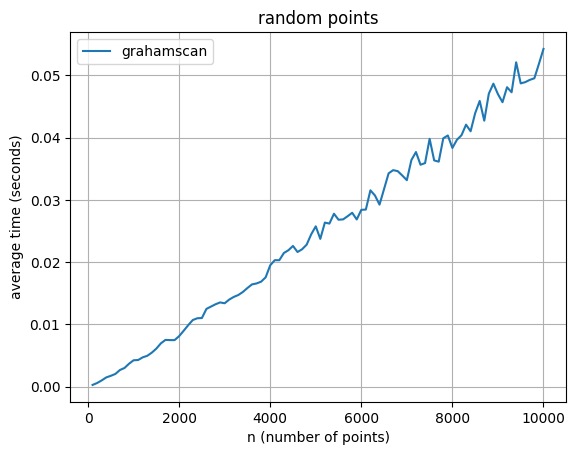

grahamscan: n = 100, average time = 0.00025038
grahamscan: n = 500, average time = 0.00128801
grahamscan: n = 1000, average time = 0.00289863
grahamscan: n = 5000, average time = 0.01708513
grahamscan: n = 10000, average time = 0.03740845


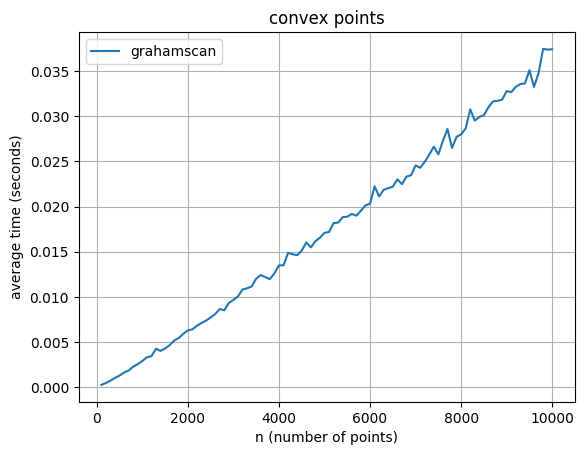

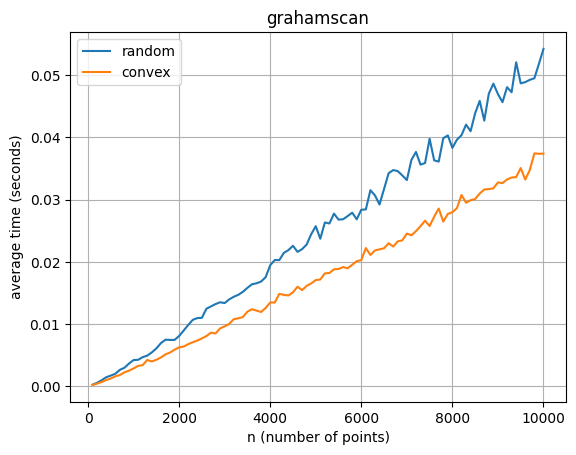

jarvismarch: n = 100, average time = 0.00030483
jarvismarch: n = 500, average time = 0.00173238
jarvismarch: n = 1000, average time = 0.00440057
jarvismarch: n = 5000, average time = 0.02726475
jarvismarch: n = 10000, average time = 0.05998934


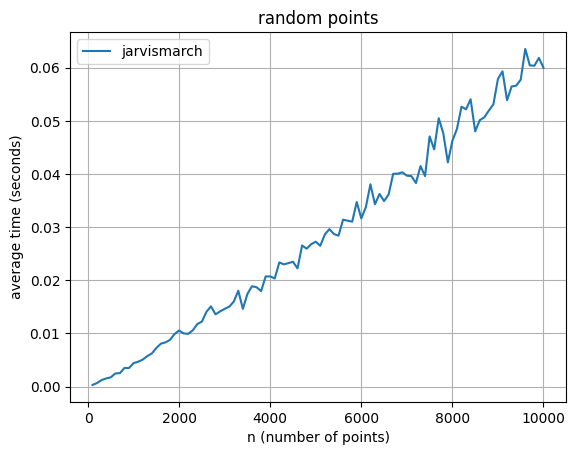

jarvismarch: n = 100, average time = 0.00228699
jarvismarch: n = 500, average time = 0.05917632
jarvismarch: n = 1000, average time = 0.21737064


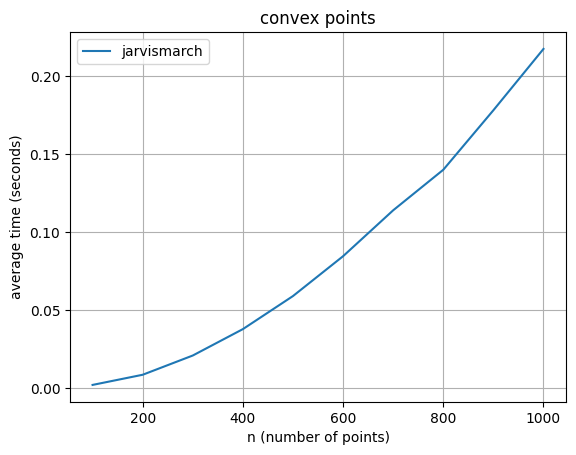

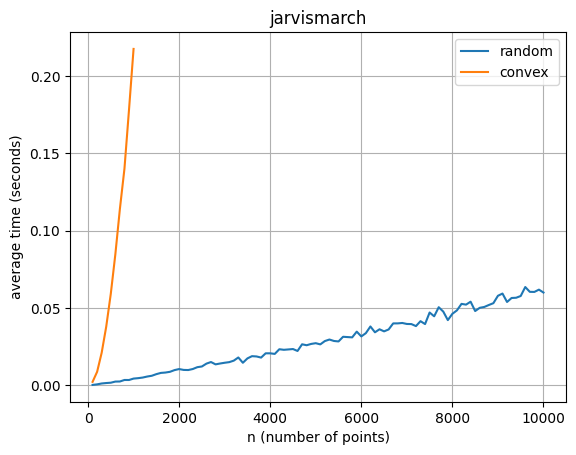

chan: n = 100, average time = 0.00032821
chan: n = 500, average time = 0.00187998
chan: n = 1000, average time = 0.00338614
chan: n = 5000, average time = 0.01787886
chan: n = 10000, average time = 0.03833112


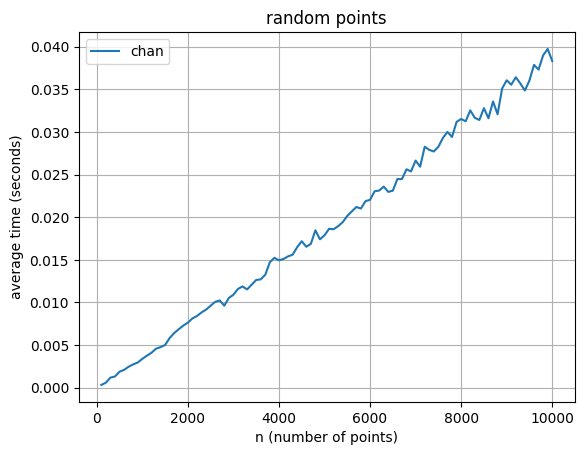

chan: n = 100, average time = 0.00029498
chan: n = 500, average time = 0.00492319
chan: n = 1000, average time = 0.01120346
chan: n = 5000, average time = 0.06531511
chan: n = 10000, average time = 0.11576328


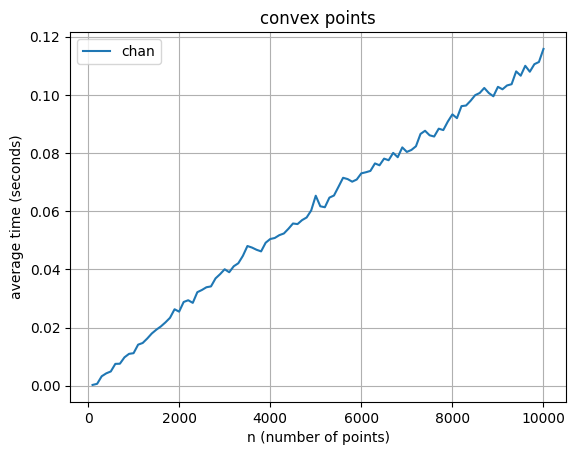

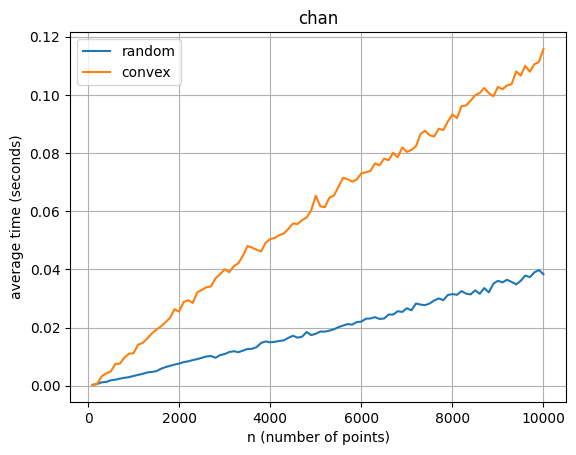

jarvismarch: n = 100, average time = 0.00026361
grahamscan: n = 100, average time = 0.00031785
chan: n = 100, average time = 0.00029709
jarvismarch: n = 500, average time = 0.00193722
grahamscan: n = 500, average time = 0.00177336
chan: n = 500, average time = 0.0015804
jarvismarch: n = 1000, average time = 0.00453972
grahamscan: n = 1000, average time = 0.0037729
chan: n = 1000, average time = 0.00348025
jarvismarch: n = 5000, average time = 0.02583965
grahamscan: n = 5000, average time = 0.02287059
chan: n = 5000, average time = 0.01829776
jarvismarch: n = 10000, average time = 0.06225341
grahamscan: n = 10000, average time = 0.05254671
chan: n = 10000, average time = 0.0384739


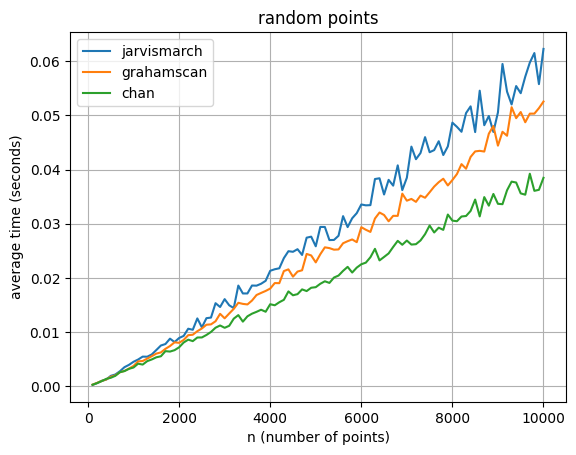

jarvismarch: n = 100, average time = 0.00222756
grahamscan: n = 100, average time = 0.00022559
chan: n = 100, average time = 0.00029052
jarvismarch: n = 500, average time = 0.05702721
grahamscan: n = 500, average time = 0.00142226
chan: n = 500, average time = 0.00514896
jarvismarch: n = 1000, average time = 0.21750605
grahamscan: n = 1000, average time = 0.00277188
chan: n = 1000, average time = 0.01195166


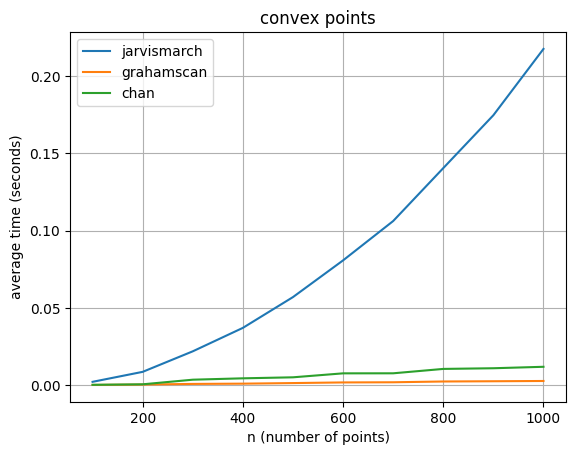

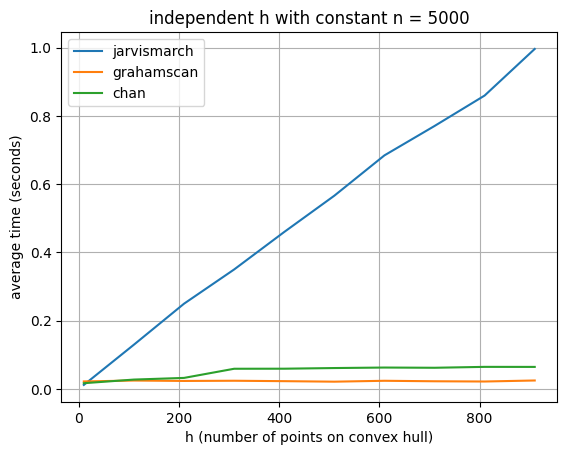

In [7]:
repeats = 10
# grahamscan
algorithms = [grahamscan]
graham_framework = ExperimentalFramework(algorithms)
n_values = list(range(100, 10001, 100))
graham_framework.run_random_experiment(n_values, repeats)
graham_framework.run_convex_experiment(n_values, repeats)
graham_framework.plot_algorithm('grahamscan')

# jarvismarch
algorithms = [jarvismarch]
jarvis_framework = ExperimentalFramework(algorithms)

n_values = list(range(100, 10001, 100))
jarvis_framework.run_random_experiment(n_values, repeats)

n_values = list(range(100, 1001, 100))
jarvis_framework.run_convex_experiment(n_values, repeats)
jarvis_framework.plot_algorithm('jarvismarch')

# chan
algorithms = [chan]
chan_framework = ExperimentalFramework(algorithms)

n_values = list(range(100, 10001, 100))
chan_framework.run_random_experiment(n_values, repeats)
chan_framework.run_convex_experiment(n_values, repeats)
chan_framework.plot_algorithm('chan')

# all
algorithms = [jarvismarch, grahamscan, chan]
framework = ExperimentalFramework(algorithms)

n_values = list(range(100, 10001, 100))
framework.run_random_experiment(n_values, repeats)
n_values = list(range(100, 1001, 100))
framework.run_convex_experiment(n_values, repeats)

n = 5000
h_values = list(range(10, 1001, 100))
framework.run_h_experiment(h_values, n, repeats)